### Préparation et Nettoyage

In [93]:
#Importation des biliotheques et chargement des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic.csv')

df.head()

,survived,pclass,name,sex,age,fare,sibsp,parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0


In [94]:
#Verification des doublons
df.duplicated().sum()

np.int64(0)

In [95]:
#Vérification des valeurs manquantes
df.isnull().sum()

survived    0
pclass      0
name        0
sex         0
age         0
fare        0
sibsp       0
parch       0
dtype: int64

In [96]:
#Vérification des types de données
df.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
fare        float64
sibsp         int64
parch         int64
dtype: object

In [97]:
#Correction des types de données
df['name'] = df['name'].astype('string')
df['pclass'] = df['pclass'].astype('category')
df['sex'] = df['sex'].astype('category')
df['survived'] = df['survived'].astype('category')

df.dtypes

survived          category
pclass            category
name        string[python]
sex               category
age                float64
fare               float64
sibsp                int64
parch                int64
dtype: object

In [98]:
# Encodage de la variable sex
from sklearn.preprocessing import LabelEncoder

df['sex'] = LabelEncoder().fit_transform(df['sex'])

df.head()

,survived,pclass,name,sex,age,fare,sibsp,parch
0,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,1,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,0,0


### Analyse exploratoire univarié

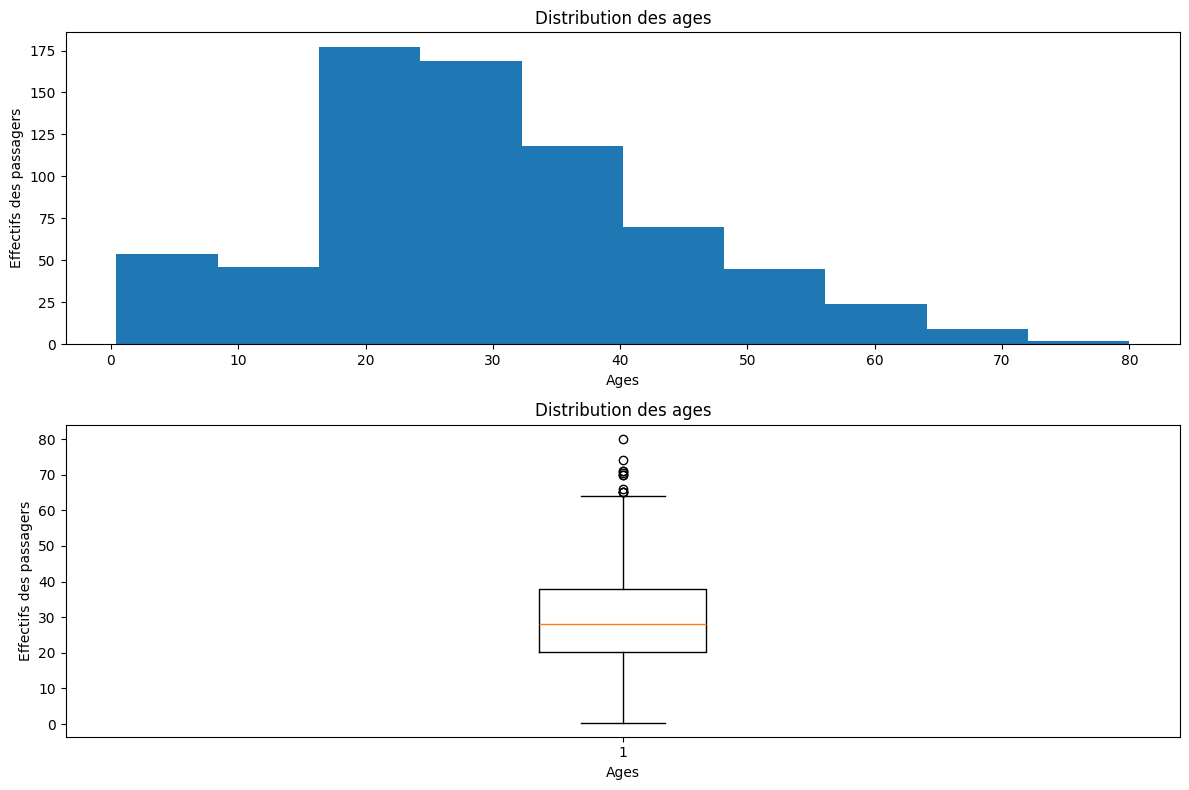

In [99]:
#Distribution des tarifs

plt.figure(figsize=(12, 8))

plt.subplot(2,1,1)
plt.hist(df['age'])

plt.title('Distribution des ages')
plt.xlabel('Ages')
plt.ylabel('Effectifs des passagers')

plt.subplot(2,1,2)
plt.boxplot(df['age'])

plt.title('Distribution des ages')
plt.xlabel('Ages')
plt.ylabel('Effectifs des passagers')

plt.tight_layout()

plt.show()

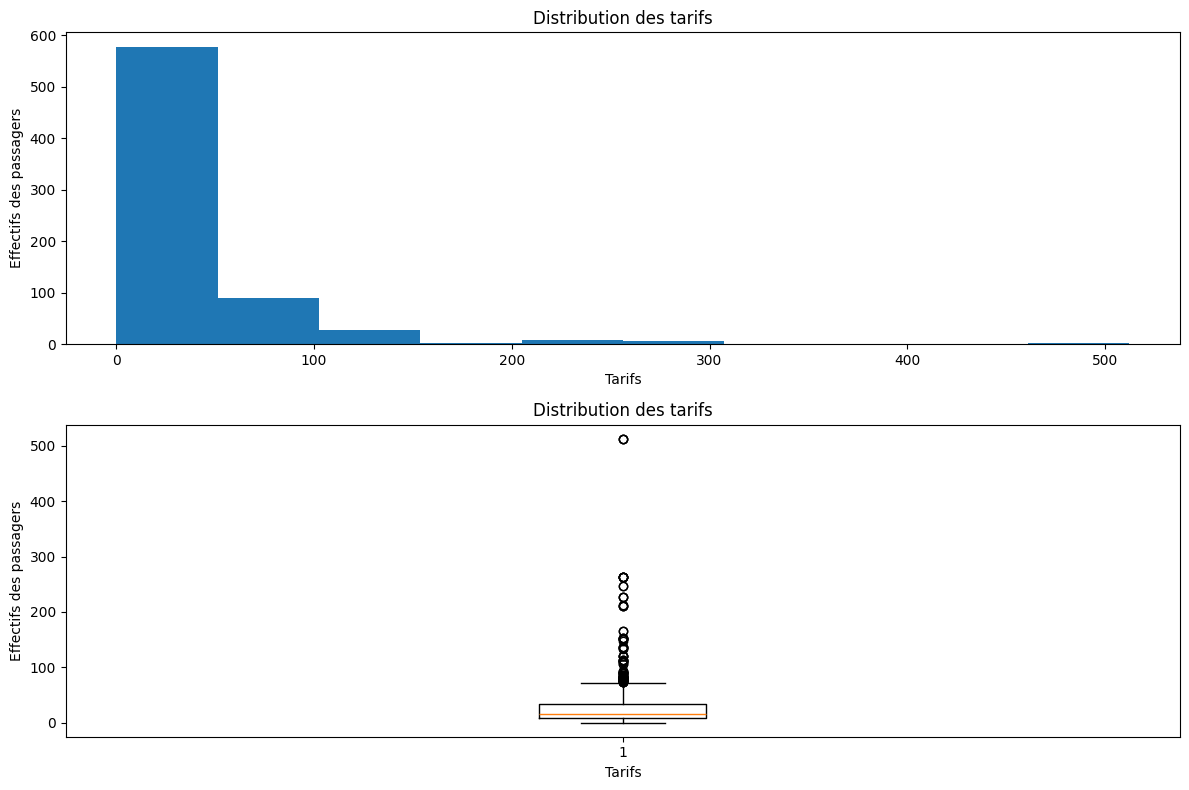

In [100]:
#Distribution des tarifs

plt.figure(figsize=(12, 8))

plt.subplot(2,1,1)
plt.hist(df['fare'])

plt.title('Distribution des tarifs')
plt.xlabel('Tarifs')
plt.ylabel('Effectifs des passagers')

plt.subplot(2,1,2)
plt.boxplot(df['fare'])

plt.title('Distribution des tarifs')
plt.xlabel('Tarifs')
plt.ylabel('Effectifs des passagers')

plt.tight_layout()

plt.show()

In [101]:
# Repartition des passagers par classe

rep_class = df.groupby('pclass')['name'].count().reset_index()
rep_class

C:\Users\HP\AppData\Local\Temp\ipykernel_2708\34118234.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rep_class = df.groupby('pclass')['name'].count().reset_index()


,pclass,name
0,1,186
1,2,173
2,3,355


In [102]:
# Repartition des passagers par sexe
rep_sex = df.groupby('sex')['name'].count().reset_index()

rep_sex

,sex,name
0,0,261
1,1,453


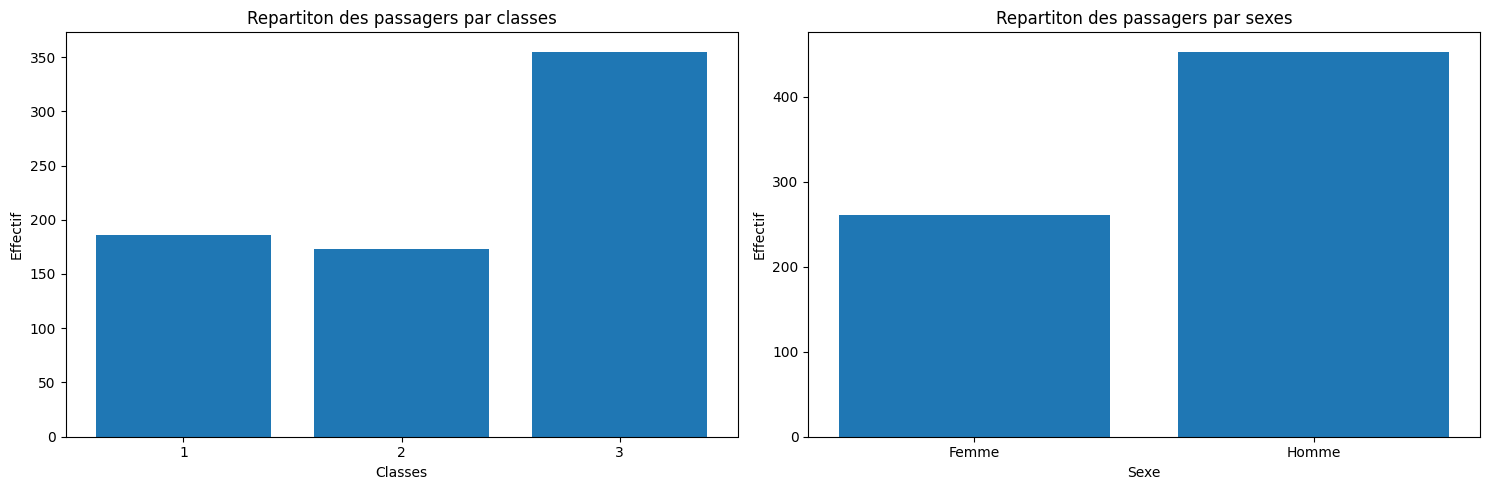

In [103]:
#Visualisation des repartitions par sexe et par classe
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.bar(rep_class['pclass'], rep_class['name'])

plt.title("Repartiton des passagers par classes")
plt.xlabel('Classes')
plt.ylabel('Effectif')

plt.xticks(rep_class['pclass'], rep_class['pclass'])

plt.subplot(1,2,2)
plt.bar(rep_sex['sex'], rep_sex['name'])

plt.title("Repartiton des passagers par sexes")
plt.xlabel('Sexe')
plt.ylabel('Effectif')
plt.xticks(rep_sex['sex'], ['Femme', 'Homme'])

plt.tight_layout()

plt.show()


In [104]:
#Taux de survie global
taux_survie = df['survived'].value_counts(normalize=True)*100
taux_survie

survived
0    59.383754
1    40.616246
Name: proportion, dtype: float64

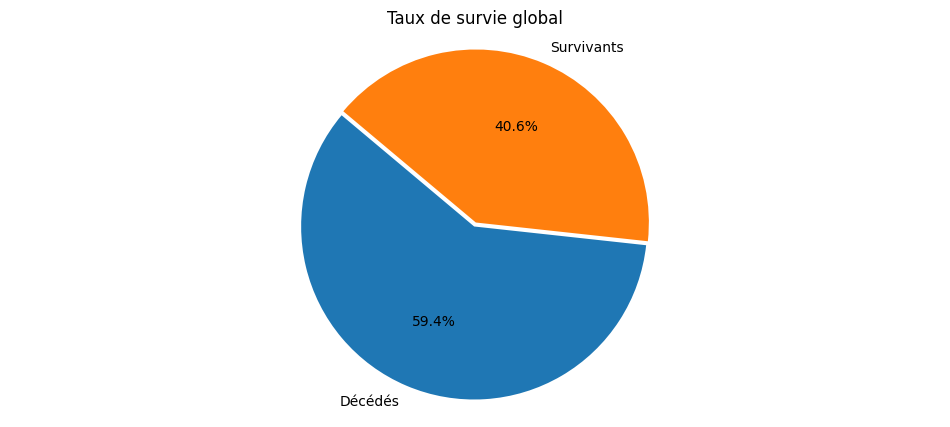

In [105]:
#Visualisation du taux de survie
plt.figure(figsize=(12, 5))
plt.pie(taux_survie, labels=['Décédés', 'Survivants'], autopct='%1.1f%%', explode=(0.025, 0), startangle=140)

plt.title('Taux de survie global')
plt.axis('equal') 

plt.show()

### Analyse multivariée

In [106]:
# Taux de survie

taux_survie_global = df['survived'].value_counts(normalize = True)*100

taux_survie_global

survived
0    59.383754
1    40.616246
Name: proportion, dtype: float64

In [107]:
print(f'Taux de survie global : {taux_survie[1]}')

Taux de survie global : 40.61624649859944


In [108]:
# nbre d'individus par sexe
df['sex'].value_counts().reset_index()

,sex,count
0,1,453
1,0,261


In [109]:
# Taux de survivants par sexe

taux_survie_par_sexe = df.groupby('sex')['survived'].value_counts(normalize=True)*100

taux_survie_par_sexe = taux_survie_par_sexe.reset_index()

taux_survie_par_sexe

,sex,survived,proportion
0,0,1,75.478927
1,0,0,24.521073
2,1,0,79.470199
3,1,1,20.529801


In [110]:
# Taux de survie par classe 

taux_survie_par_classe = df.groupby('pclass')['survived'].value_counts(normalize = True).reset_index()

taux_survie_par_classe

C:\Users\HP\AppData\Local\Temp\ipykernel_2708\1695932811.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taux_survie_par_classe = df.groupby('pclass')['survived'].value_counts(normalize = True).reset_index()


,pclass,survived,proportion
0,1,1,0.655914
1,1,0,0.344086
2,2,0,0.520231
3,2,1,0.479769
4,3,0,0.760563
5,3,1,0.239437


In [111]:
#Conversion de types pour faciliter les tableaux croisés

df.sex = df.sex.astype('int')
df.survived = df.survived.astype('int')
df.pclass = df.pclass.astype('int')

df.dtypes

survived             int64
pclass               int64
name        string[python]
sex                  int64
age                float64
fare               float64
sibsp                int64
parch                int64
dtype: object

In [112]:
# Taux de survie selon l'age

# Grouper les ages par tranches
df['age_group'] = pd.cut(df['age'], bins = [0, 12, 20, 45, 60, 80], labels = ['0-12','13-20', '21-45', '46-60', '61-80'])

# Calcul du taux de survie par tranche d'âge
taux_survie_par_age = df.groupby('age_group')['survived'].mean() * 100

# Affichage des résultats
print("Taux de survie par tranche d'âge :")
print(taux_survie_par_age.round(2).reset_index())

Taux de survie par tranche d'âge :
  age_group  survived
0      0-12     57.97
1     13-20     38.18
2     21-45     39.35
3     46-60     40.74
4     61-80     22.73


C:\Users\HP\AppData\Local\Temp\ipykernel_2708\1350023519.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taux_survie_par_age = df.groupby('age_group')['survived'].mean() * 100


In [113]:
# Taux de survie par classe et sexe
taux_survie_par_classe_et_sex = df.pivot_table(
    values='survived',
    index='pclass',
	columns = 'sex',
    aggfunc='mean'
) * 100

print("Taux de survie par classe et sexe :")
taux_survie_par_classe_et_sex.round(2)

Taux de survie par classe et sexe :


sex,0,1
pclass,,
1,96.47,39.60
2,91.89,15.15
3,46.08,15.02


In [114]:
# Taux de survie par sexe et age

taux_survie_par_sex_et_age = df.pivot_table(
	index = "age_group",
	columns = "sex",
	values = "survived",
	aggfunc = "mean"
) * 100

print("Taux de survie par sexe et tranche d'âge :")
taux_survie_par_sex_et_age.round(2)

Taux de survie par sexe et tranche d'âge :


C:\Users\HP\AppData\Local\Temp\ipykernel_2708\173755168.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  taux_survie_par_sex_et_age = df.pivot_table(


sex,0,1
age_group,,
0-12,59.38,56.76
13-20,75.56,12.31
21-45,76.62,18.71
46-60,85.19,18.52
61-80,100.00,10.53


### Visualisations

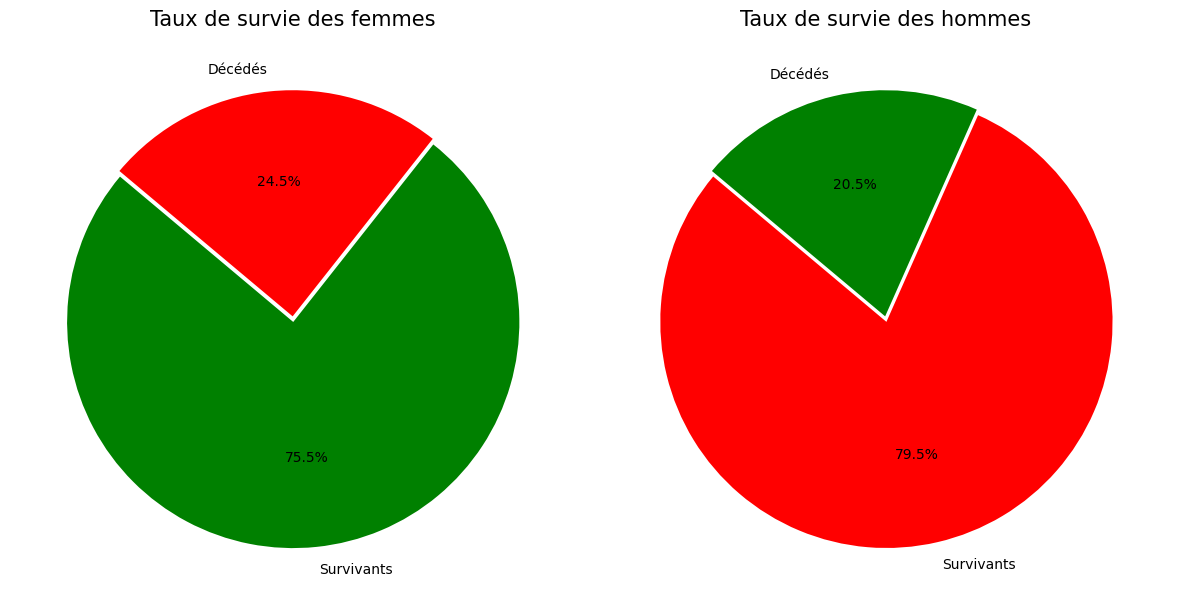

In [115]:
# VIsualisation du taux de survie par sexe

# Taux de survie pour les femmes
taux_survie_femme = taux_survie_par_sexe[taux_survie_par_sexe['sex'] == 0]

taux_survie_homme = taux_survie_par_sexe[taux_survie_par_sexe['sex'] == 1]


#Creation du graphique
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(taux_survie_femme['proportion'], labels=['Survivants', 'Décédés'], autopct='%1.1f%%',colors=['green', 'red'], explode=(0.025, 0), startangle=140)

plt.title('Taux de survie des femmes', size=15)

# Taux de survie pour les hommes

plt.subplot(1, 2, 2)
plt.pie(taux_survie_homme['proportion'], labels=['Survivants', 'Décédés'], autopct='%1.1f%%',colors=['red', 'green'], explode=(0.025, 0), startangle=140)
plt.title('Taux de survie des hommes', size=15)

plt.tight_layout()

plt.show()

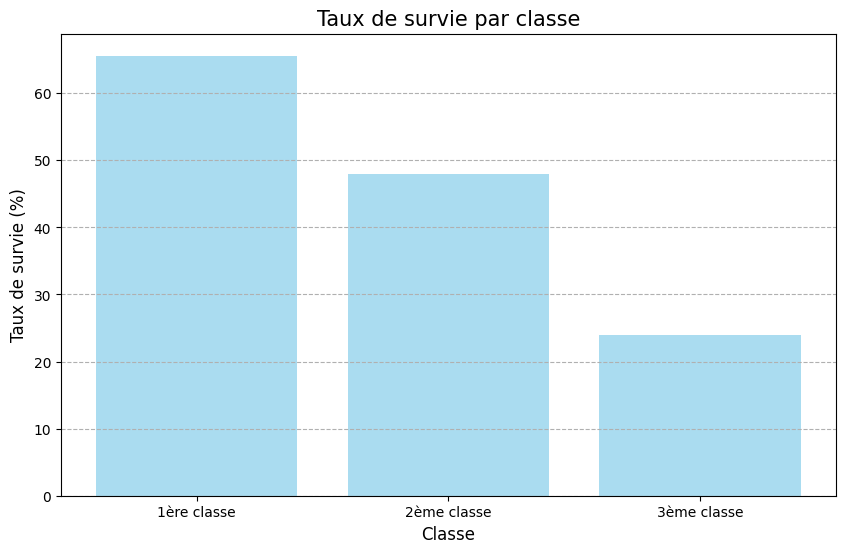

In [116]:
# Taux de survie par classe
taux_survie_classe = df.pivot_table(
    values='survived',
    index='pclass',
    aggfunc='mean'
) * 100

# Creation du graphique
plt.figure(figsize=(10, 6))
plt.bar(taux_survie_classe.index, taux_survie_classe['survived'], color='skyblue', alpha=0.7)

plt.title('Taux de survie par classe', size=15)
plt.xlabel('Classe', size=12)
plt.ylabel('Taux de survie (%)', size=12)


plt.xticks(taux_survie_classe.index, ['1ère classe', '2ème classe', '3ème classe'])
plt.grid(axis='y', linestyle='--')

plt.show()

### Modèle de prédiction simple (logistic regression).

In [117]:
# Importation des bibliothèques pour la modélisation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [118]:
# Préparation des données pour la modélisation
x = df[['pclass', 'sex', 'age']]
y = df['survived']

In [119]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [120]:
# Standardisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [121]:
# Création et entrainement du modèle
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [122]:
# Prédictions
y_pred = model.predict(X_test)

In [123]:
# Évaluation du modèle
# Score de précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle:", accuracy)

Précision du modèle: 0.7482517482517482


In [124]:
# Rapport de classification détaillé
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))


Rapport de classification:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        87
           1       0.67      0.70      0.68        56

    accuracy                           0.75       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.75      0.75      0.75       143



In [125]:
#creation d'une fonction pour prédire la survie
def predict_survival(pclass, sex, age):
	new_passenger = pd.DataFrame({
        'pclass': [pclass],
        'sex': [sex],  
        'age': [age]
    })

	# Prédiction de la survie
	prediction = model.predict(new_passenger)
	proba = model.predict_proba(new_passenger)

	# Affichage des résultats
	print("\nProfil du passager :")
	print(f"Classe : {pclass}")
	print(f"Sexe : {'Homme' if sex == 1 else 'Femme'}")
	print(f"Age : {age} ans")
	print("\nRésultat :")
	print(f"Survie prédite : {'Survit' if prediction[0] == 1 else 'Ne survit pas'}")
	print(f"Probabilité de survie : {proba[0][1]:.2%}")

In [126]:
# Test de la fonction
predict_survival(
    pclass=1,
    sex=0,     
    age=25
)


Profil du passager :
Classe : 1
Sexe : Femme
Age : 25 ans

Résultat :
Survie prédite : Survit
Probabilité de survie : 94.57%


In [127]:
# Test avec un autre profil
predict_survival(pclass=3, sex=1, age=30) 


Profil du passager :
Classe : 3
Sexe : Homme
Age : 30 ans

Résultat :
Survie prédite : Ne survit pas
Probabilité de survie : 8.44%
